<a href="https://colab.research.google.com/github/menna03/Airbnb-New-User-Bookings/blob/main/Airbnb_New_User_Bookings_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from matplotlib.ticker import PercentFormatter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Define file paths
file_paths = [
    '/content/drive/MyDrive/Airbnb New User Bookings/age_gender_bkts.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/countries.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/sample_submission_NDF.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/sessions.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/test_users.csv',
    '/content/drive/MyDrive/Airbnb New User Bookings/train_users_2.csv'
]

# Create a dictionary to store DataFrames
data_frames = {}

# Read each CSV file and store it in the dictionary
for file_path in file_paths:
    file_name = file_path.split('/')[-1].split('.')[0]  # Extract the file name without extension
    data_frames[file_name] = pd.read_csv(file_path)

# Access the DataFrames using keys
age_gender_bkts_df = data_frames['age_gender_bkts']
countries_df = data_frames['countries']
sample_submission_df = data_frames['sample_submission_NDF']
sessions_df = data_frames['sessions']
test_users_df = data_frames['test_users']
train_users_df = data_frames['train_users_2']

# Exploring data

In [4]:
age_gender_bkts_df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [5]:
countries_df.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [6]:
(sample_submission_df.head())

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


In [7]:
(sessions_df.head())

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [8]:
(train_users_df.head())

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [9]:
train_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [10]:
# Display the shape of each DataFrame
print("age_gender_bkts DataFrame Shape:", age_gender_bkts_df.shape)
print("countries DataFrame Shape:", countries_df.shape)
print("sample_submission_NDF DataFrame Shape:", sample_submission_df.shape)
print("sessions DataFrame Shape:", sessions_df.shape)
print("test_users DataFrame Shape:", test_users_df.shape)
print("train_users_2 DataFrame Shape:", train_users_df.shape)


age_gender_bkts DataFrame Shape: (420, 5)
countries DataFrame Shape: (10, 7)
sample_submission_NDF DataFrame Shape: (62096, 2)
sessions DataFrame Shape: (10567737, 6)
test_users DataFrame Shape: (62096, 15)
train_users_2 DataFrame Shape: (213451, 16)


# processing data


In [11]:
sessions_df['user_id'].duplicated().sum()

10432253

In [12]:
sessions_df.shape

(10567737, 6)

In [13]:
sessions_df=sessions_df.drop_duplicates(subset=['user_id'])


In [14]:
sessions_df['user_id'].duplicated().sum()

0

In [15]:
sessions_df.shape

(135484, 6)

In [16]:
merged_df = pd.merge(sessions_df, train_users_df, left_on='user_id', right_on='id')
merged_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,date_account_created,timestamp_first_active,date_first_booking,...,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,...,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
1,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0,yo8nz8bqcq,2014-01-01,20140101001558,NaN,...,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
2,4grx6yxeby,verify,-unknown-,-unknown-,Windows Desktop,65080.0,4grx6yxeby,2014-01-01,20140101001639,NaN,...,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
3,ncf87guaf0,lookup,NaN,NaN,Windows Desktop,2204.0,ncf87guaf0,2014-01-01,20140101002146,NaN,...,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
4,4rvqpxoh3h,campaigns,-unknown-,-unknown-,iPhone,375.0,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,...,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB


In [17]:
merged_df.isna().sum()* 100 / len(train_users_df)


user_id                     0.000000
action                      0.933704
action_type                 2.959930
action_detail               2.959930
device_type                 0.000000
secs_elapsed                2.873259
id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         21.101330
gender                      0.000000
age                        15.107917
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     0.141484
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

In [18]:
merged_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,id,date_account_created,timestamp_first_active,date_first_booking,...,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,...,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other
1,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0,yo8nz8bqcq,2014-01-01,20140101001558,NaN,...,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
2,4grx6yxeby,verify,-unknown-,-unknown-,Windows Desktop,65080.0,4grx6yxeby,2014-01-01,20140101001639,NaN,...,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF
3,ncf87guaf0,lookup,NaN,NaN,Windows Desktop,2204.0,ncf87guaf0,2014-01-01,20140101002146,NaN,...,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
4,4rvqpxoh3h,campaigns,-unknown-,-unknown-,iPhone,375.0,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,...,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB


In [19]:
merged_df['date_account_created'] = pd.to_datetime(merged_df['date_account_created'])
merged_df['timestamp_first_active'] = pd.to_datetime(merged_df['timestamp_first_active'], format='%Y%m%d%H%M%S')


In [20]:
merged_df['date_first_booking'].replace("Don't Know", pd.NaT, inplace=True)

# Convert date_first_booking column to datetime
merged_df['date_first_booking'] = pd.to_datetime(merged_df['date_first_booking'])

In [21]:
merged_df['date_account_created'] = pd.to_datetime(merged_df['date_account_created'])
merged_df['timestamp_first_active'] = pd.to_datetime(merged_df['timestamp_first_active'])

# Extract year, month, and day for each column
merged_df['account_created_year'] = merged_df['date_account_created'].dt.year
merged_df['account_created_month'] = merged_df['date_account_created'].dt.month
merged_df['account_created_day'] = merged_df['date_account_created'].dt.day

merged_df['first_active_year'] = merged_df['timestamp_first_active'].dt.year
merged_df['first_active_month'] = merged_df['timestamp_first_active'].dt.month
merged_df['first_active_day'] = merged_df['timestamp_first_active'].dt.day


# Drop the original date columns if needed
merged_df.drop(['date_account_created', 'timestamp_first_active'], axis=1, inplace=True)

In [22]:
notold=merged_df.loc[merged_df['age'] < 15, 'age']
old=merged_df.loc[merged_df['age'] >= 122 , 'age']

In [23]:
merged_df.loc[merged_df['age'] >= 1000, 'age']= merged_df['account_created_year']-merged_df.loc[merged_df['age'] > 1000, 'age']

In [24]:
old.describe()
#will stay

count     133.000000
mean     1975.646617
std       229.071055
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [25]:
notold.describe()

count    2.000000
mean     1.500000
std      0.707107
min      1.000000
25%      1.250000
50%      1.500000
75%      1.750000
max      2.000000
Name: age, dtype: float64

In [26]:
merged_df.isna().sum()* 100 / len(merged_df)


user_id                     0.000000
action                      2.699993
action_type                 8.559236
action_detail               8.559236
device_type                 0.000000
secs_elapsed                8.308609
id                          0.000000
date_first_booking         61.018763
gender                      0.000000
age                        43.687597
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     0.409131
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
account_created_year        0.000000
account_created_month       0.000000
account_created_day         0.000000
first_active_year           0.000000
first_active_month          0.000000
first_active_day            0.000000
dtype: float64

In [27]:
merged_df.dtypes

user_id                            object
action                             object
action_type                        object
action_detail                      object
device_type                        object
secs_elapsed                      float64
id                                 object
date_first_booking         datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
account_created_year                int64
account_created_month               int64
account_created_day                 int64
first_active_year                 

In [28]:
merged_df.drop('id', axis=1, inplace=True)

In [29]:
merged_df.isna().sum()* 100 / len(merged_df)



user_id                     0.000000
action                      2.699993
action_type                 8.559236
action_detail               8.559236
device_type                 0.000000
secs_elapsed                8.308609
date_first_booking         61.018763
gender                      0.000000
age                        43.687597
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     0.409131
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
account_created_year        0.000000
account_created_month       0.000000
account_created_day         0.000000
first_active_year           0.000000
first_active_month          0.000000
first_active_day            0.000000
dtype: float64

In [30]:
merged_df.fillna("Don't Know", inplace=True)


In [31]:
language_dict = {
    'en': 'English',
    'zh': 'Chinese',
    'ko': 'Korean',
    'fr': 'French',
    'es': 'Spanish',
    'de': 'German',
    'ru': 'Russian',
    'it': 'Italian',
    'ja': 'Japanese',
    'pt': 'Portuguese',
    'sv': 'Swedish',
    'nl': 'Dutch',
    'pl': 'Polish',
    'tr': 'Turkish',
    'da': 'Danish',
    'th': 'Thai',
    'cs': 'Czech',
    'id': 'Indonesian',
    'el': 'Greek',
    'no': 'Norwegian',
    'fi': 'Finnish',
    'hu': 'Hungarian',
    'is': 'Icelandic',
    'ca': 'Catalan'
}

merged_df['language'] = merged_df['language'].map(language_dict)

In [32]:
value_counts = merged_df['country_destination'].value_counts()
print(value_counts)

NDF      45041
US       20095
other     3655
FR        1435
IT         979
GB         731
ES         707
CA         440
DE         250
NL         247
AU         152
PT          83
Name: country_destination, dtype: int64


In [33]:
country_dict = {
    'NDF': 'No Destination',
    'US': 'United States',
    'other': 'Other',
    'FR': 'France',
    'IT': 'Italy',
    'GB': 'United Kingdom',
    'ES': 'Spain',
    'CA': 'Canada',
    'DE': 'Germany',
    'NL': 'Netherlands',
    'AU': 'Australia',
    'PT': 'Portugal'
}
merged_df['country_destination'] = merged_df['country_destination'].map(country_dict)

# visualization

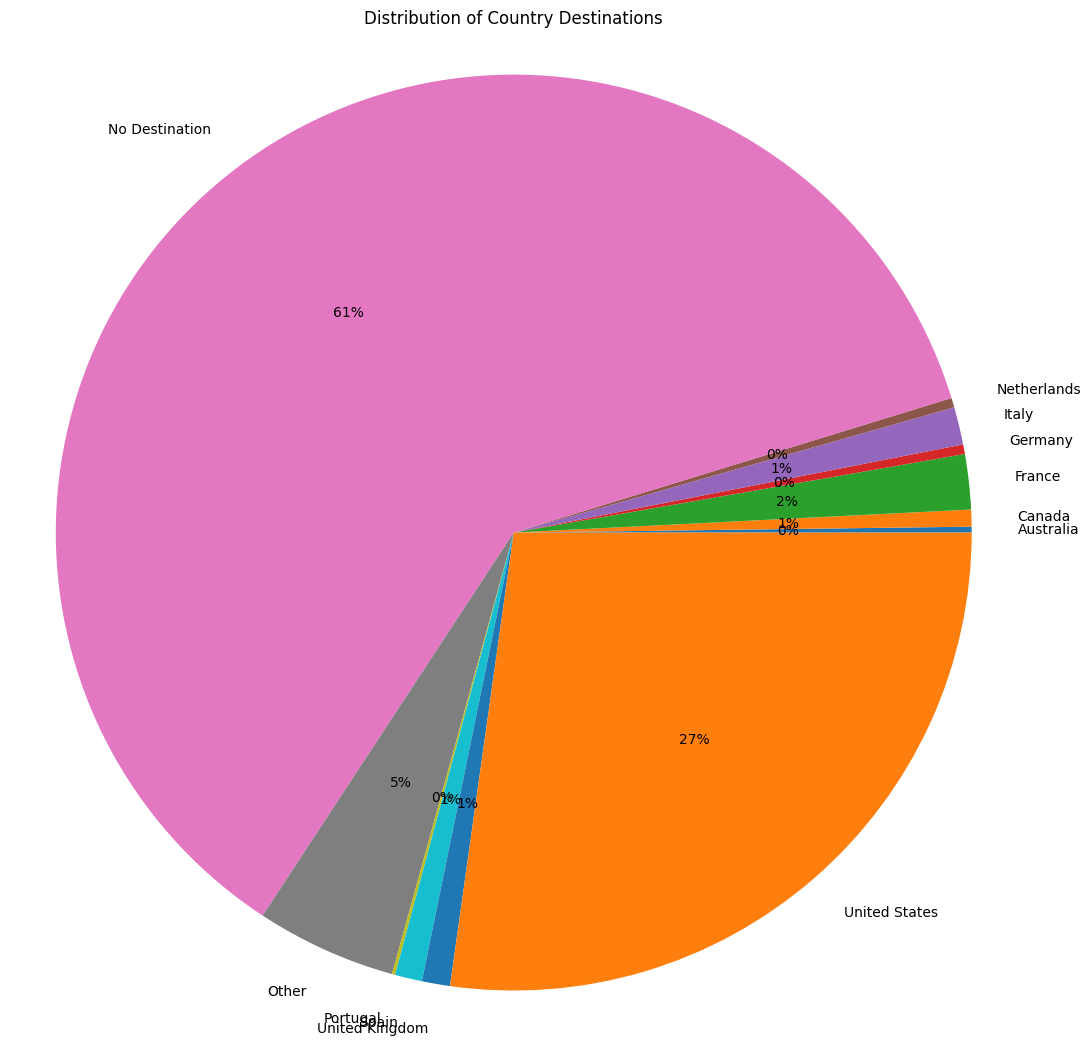

In [34]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame
grouped_df = merged_df.groupby(['country_destination']).size().reset_index(name='count')

# Create a larger figure for the pie chart
plt.figure(figsize=(13, 13))

# Create the pie chart
plt.pie(grouped_df['count'], labels=grouped_df['country_destination'], autopct='%1.0f%%')
plt.title('Distribution of Country Destinations')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

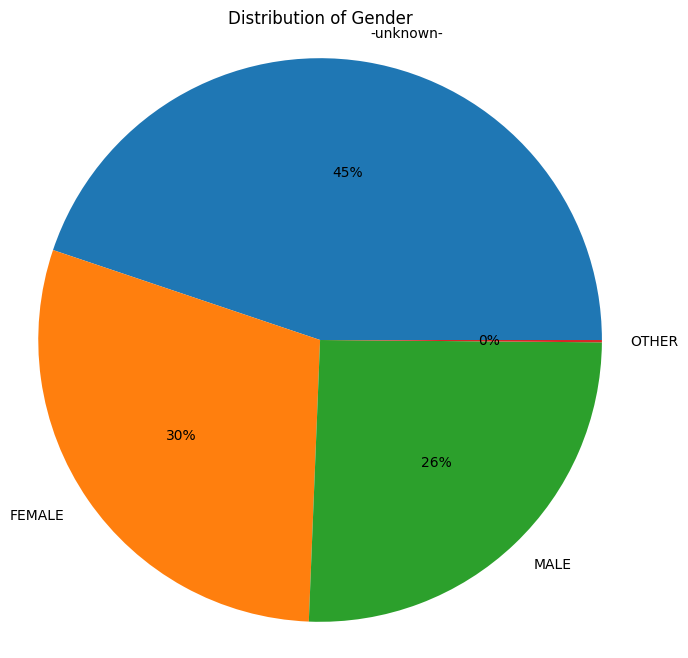

In [35]:
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame
grouped_df = train_users_df.groupby(['gender']).size().reset_index(name='count')

# Create a larger figure for the pie chart
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(grouped_df['count'], labels=grouped_df['gender'], autopct='%1.0f%%')
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

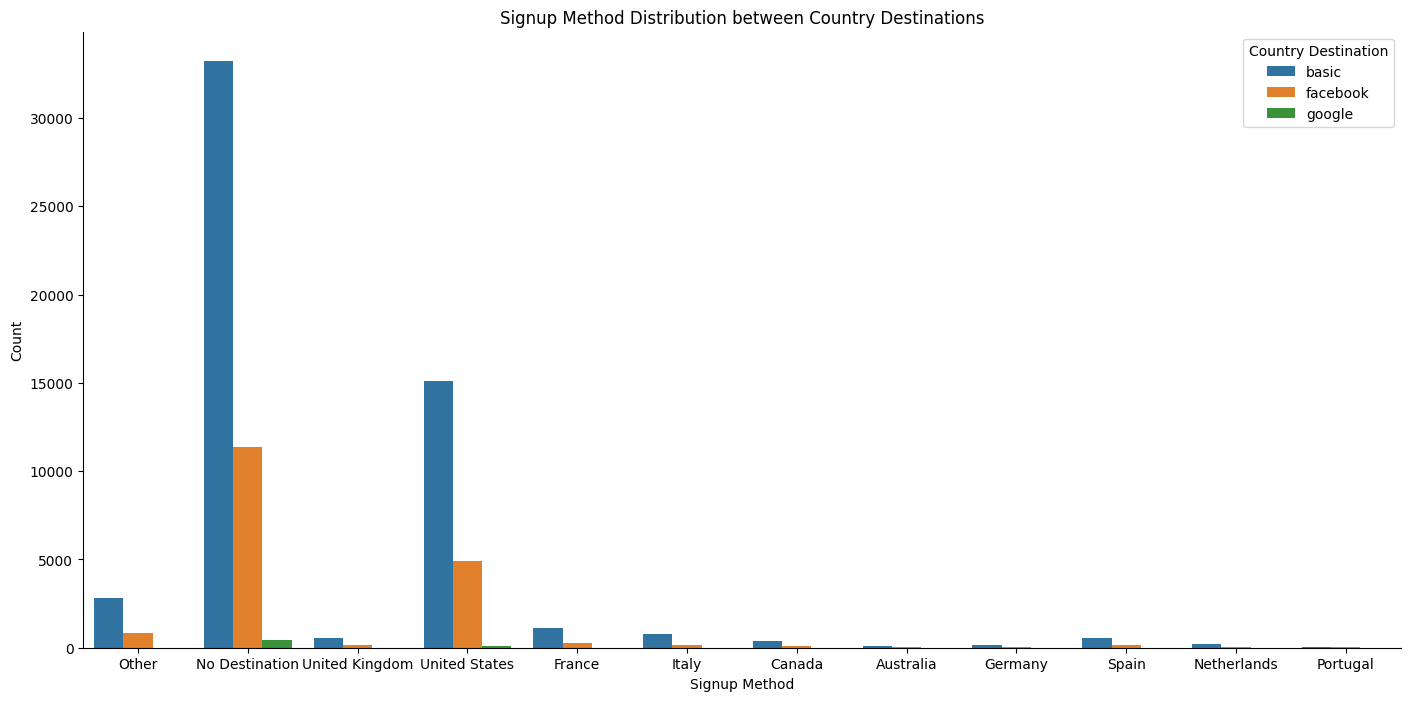

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 8))

# Assuming 'train_users_df' is your DataFrame
sns.countplot(x='country_destination', hue='signup_method', data=merged_df)
plt.xlabel('Signup Method')
plt.ylabel('Count')
plt.title('Signup Method Distribution between Country Destinations')

# Adjust the position of the legend
plt.legend(title='Country Destination', loc='upper right')


sns.despine()
plt.show()

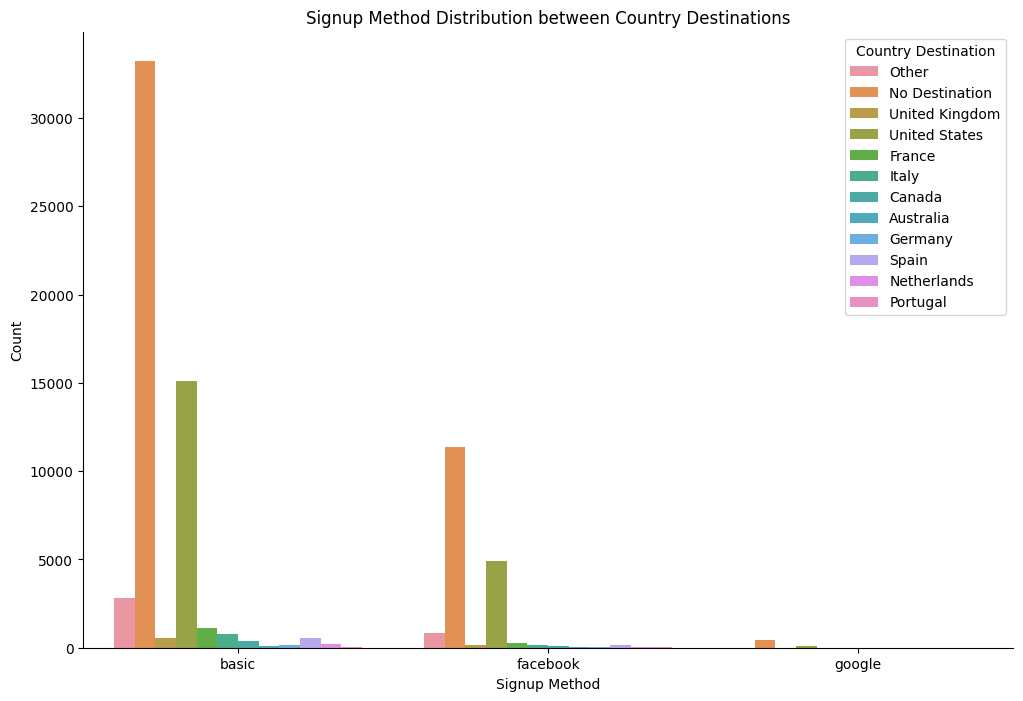

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Assuming 'train_users_df' is your DataFrame
sns.countplot(x='signup_method', hue='country_destination', data=merged_df)
plt.xlabel('Signup Method')
plt.ylabel('Count')
plt.title('Signup Method Distribution between Country Destinations')

# Adjust the position of the legend
plt.legend(title='Country Destination', loc='upper right')

sns.despine()
plt.show()


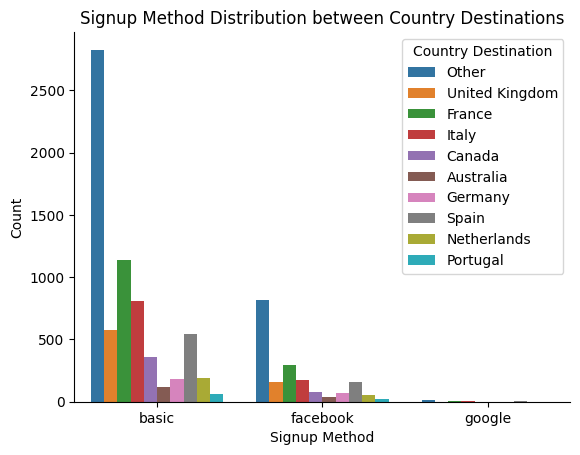

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with 'No Destination' as the country destination
non_ndf_users = merged_df[(merged_df['country_destination'] != 'No Destination') & (merged_df['country_destination'] != 'United States')]

# Create a countplot with the 'signup_method' on the x-axis and 'country_destination' on the hue
sns.countplot(x='signup_method', hue='country_destination', data=non_ndf_users)

# Set the x-axis and y-axis labels and the title
plt.xlabel('Signup Method')
plt.ylabel('Count')
plt.title('Signup Method Distribution between Country Destinations')

# Move the legend to the upper right corner
plt.legend(title='Country Destination', loc='upper right')

# Remove the top and right spines
sns.despine()

# Show the plot

plt.show()

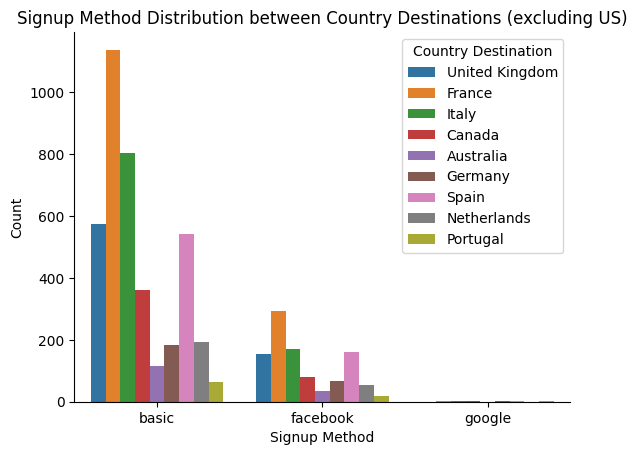

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with 'No Destination' or 'US' as the country destination
non_ndf_users = merged_df[(merged_df['country_destination'] != 'No Destination') & (merged_df['country_destination'] != 'United States')& (merged_df['country_destination'] != 'Other')]

# Create a countplot with the 'signup_method' on the x-axis and 'country_destination' on the hue
sns.countplot(x='signup_method', hue='country_destination', data=non_ndf_users)

# Set the x-axis and y-axis labels and the title
plt.xlabel('Signup Method')
plt.ylabel('Count')
plt.title('Signup Method Distribution between Country Destinations (excluding US)')

# Move the legend to the upper right corner
plt.legend(title='Country Destination', loc='upper right')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


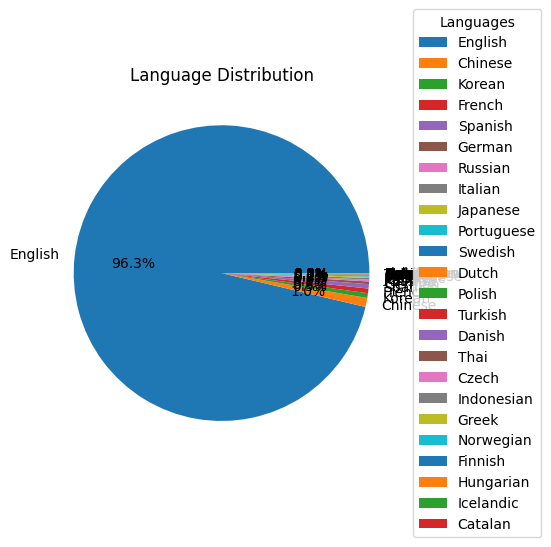

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Don't Know" with NaN
merged_df['age'].replace("Don't Know", np.nan, inplace=True)

# Create a pie chart
counts = merged_df["language"].value_counts()
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Language Distribution")

# Add a legend
plt.legend(title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.show()

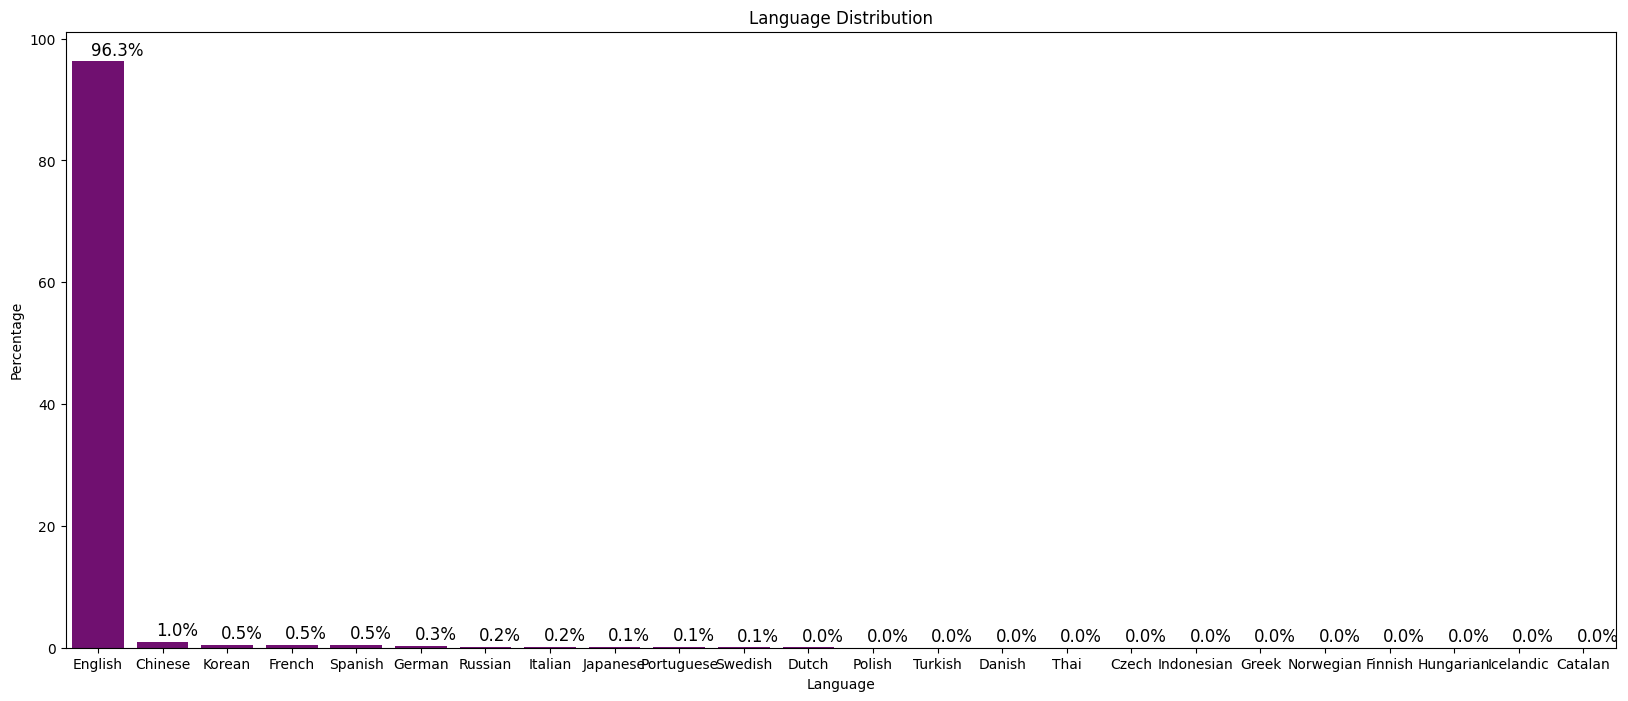

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Don't Know" with NaN
merged_df['age'].replace("Don't Know", np.nan, inplace=True)
plt.figure(figsize=(20, 8))

# Create a bar chart
counts = merged_df["language"].value_counts(normalize=True) * 100
ax = sns.barplot(x=counts.index, y=counts, color='purple')
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.title('Language Distribution')

# Add percentage labels to the top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), fontsize=12)

plt.show()

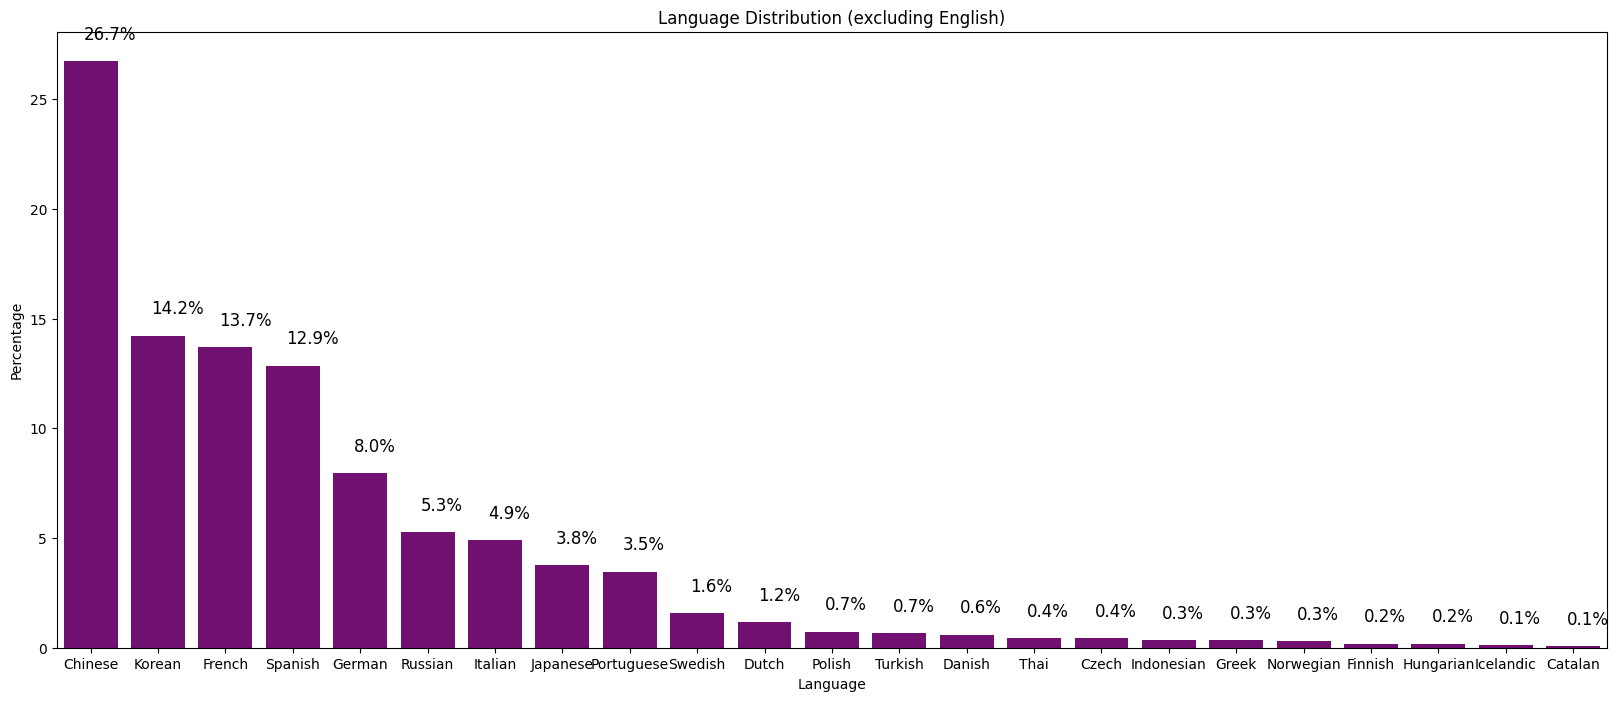

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Don't Know" with NaN
merged_df['age'].replace("Don't Know", np.nan, inplace=True)

# Filter out rows with 'English' as the language
non_en_users = merged_df[merged_df['language'] != 'English']

# Create a bar chart with the 'language' on the x-axis and percentage on the y-axis
counts = non_en_users["language"].value_counts(normalize=True) * 100
plt.figure(figsize=(20, 8))
ax = sns.barplot(x=counts.index, y=counts, color='purple')

# Set the x-axis and y-axis labels and the title
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.title('Language Distribution (excluding English)')

# Add percentage labels to the top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), fontsize=12)

# Show the plot
plt.show()


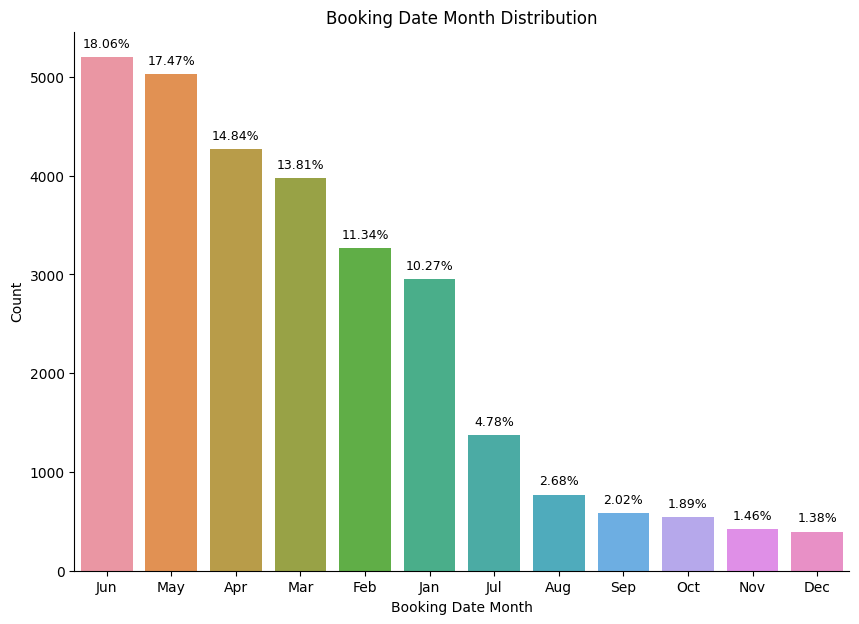

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Don't Know" with NaN
merged_df['date_first_booking'].replace("Don't Know", pd.NaT, inplace=True)

# Convert date_first_booking column to datetime
merged_df['date_first_booking'] = pd.to_datetime(merged_df['date_first_booking'])

# Create a bar graph
plt.figure(figsize=(10, 7))
months_freq = merged_df['date_first_booking'].dropna().dt.month_name().str[:3]
counts = months_freq.value_counts()
counts_order = counts.index
sns.countplot(x=months_freq, order=counts_order)
plt.xlabel('Booking Date Month')
plt.ylabel('Count')
plt.title('Booking Date Month Distribution')
for i in range(counts.shape[0]):
    plt.text(i, counts[i]+100, f"{counts[i]/months_freq.shape[0]*100:0.2f}%", ha='center', fontsize=9)
sns.despine()
plt.show()

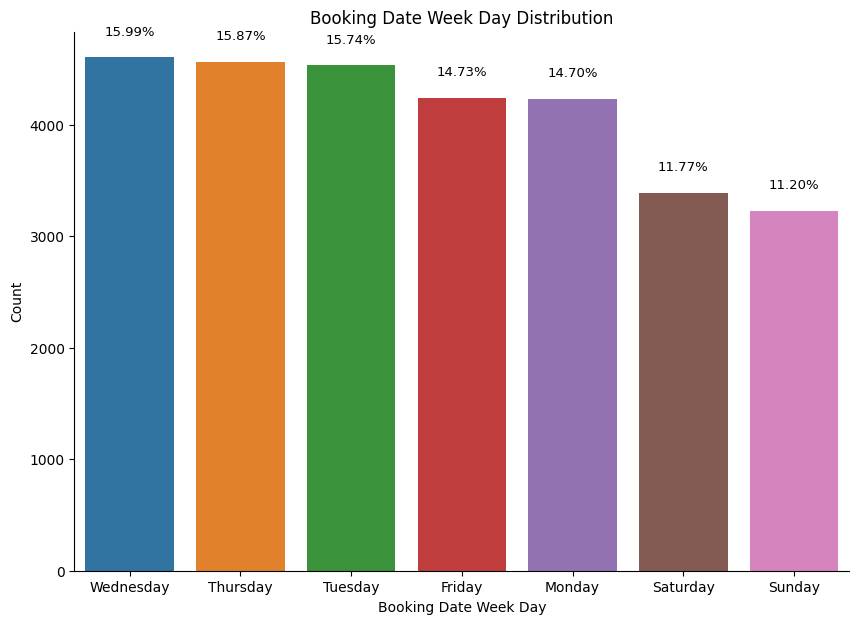

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Don't Know" with NaN
merged_df['date_first_booking'].replace("Don't Know", pd.NaT, inplace=True)

# Convert date_first_booking column to datetime
merged_df['date_first_booking'] = pd.to_datetime(merged_df['date_first_booking'])

# Create a bar graph
plt.figure(figsize=(10, 7))
week_days_freq = merged_df['date_first_booking'].dropna().dt.day_name()
counts = week_days_freq.value_counts()
counts_order = counts.index
sns.countplot(x=week_days_freq, order=counts_order)
plt.xlabel('Booking Date Week Day')
plt.ylabel('Count')
plt.title('Booking Date Week Day Distribution')
for i in range(counts.shape[0]):
    plt.text(i, counts[i]+200, f"{counts[i]/week_days_freq.shape[0]*100:0.2f}%", ha='center', fontsize=9.5)
sns.despine()
plt.show()

<ipython-input-45-3107385e0b86>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


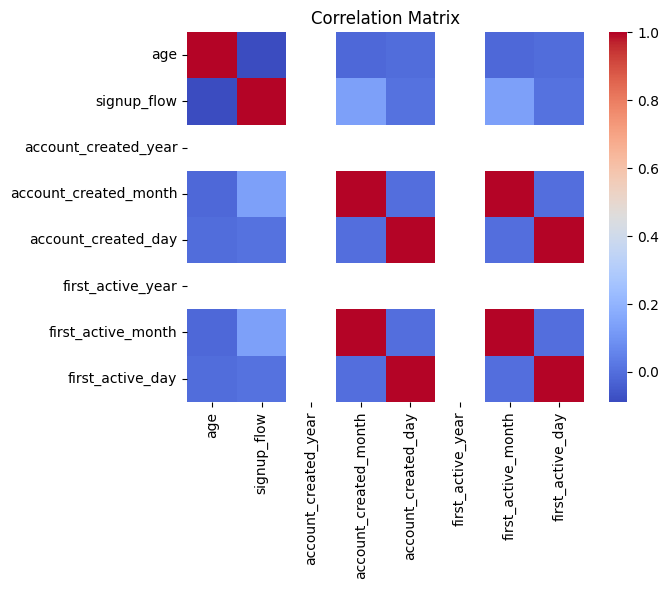

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = merged_df.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<ipython-input-63-93e636bf5ed1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


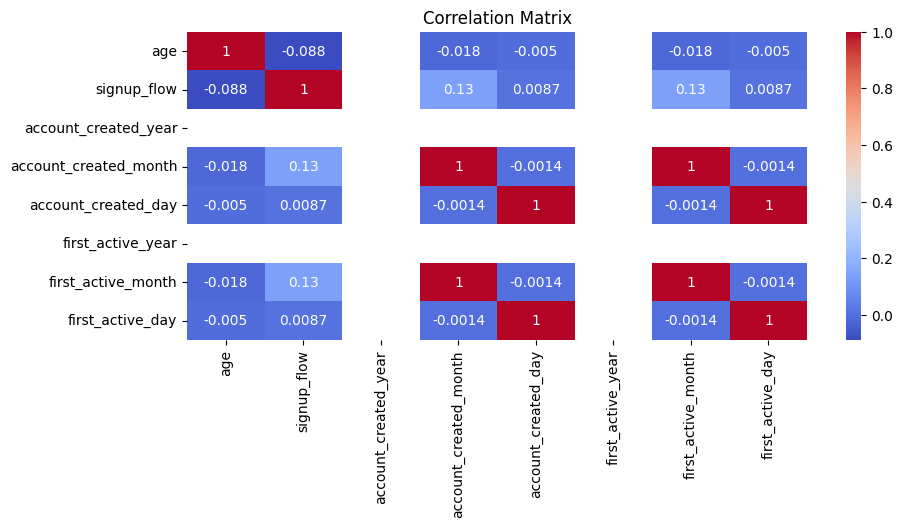

In [63]:
correlation_matrix = merged_df.corr()

plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

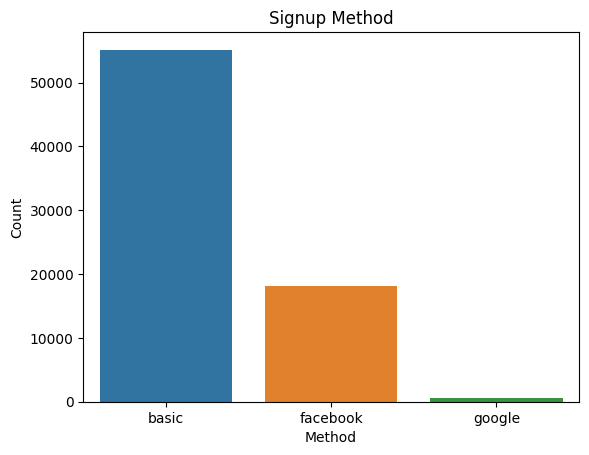

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=merged_df, x="signup_method")
plt.title("Signup Method")
plt.xlabel("Method")
plt.ylabel("Count")
plt.show()

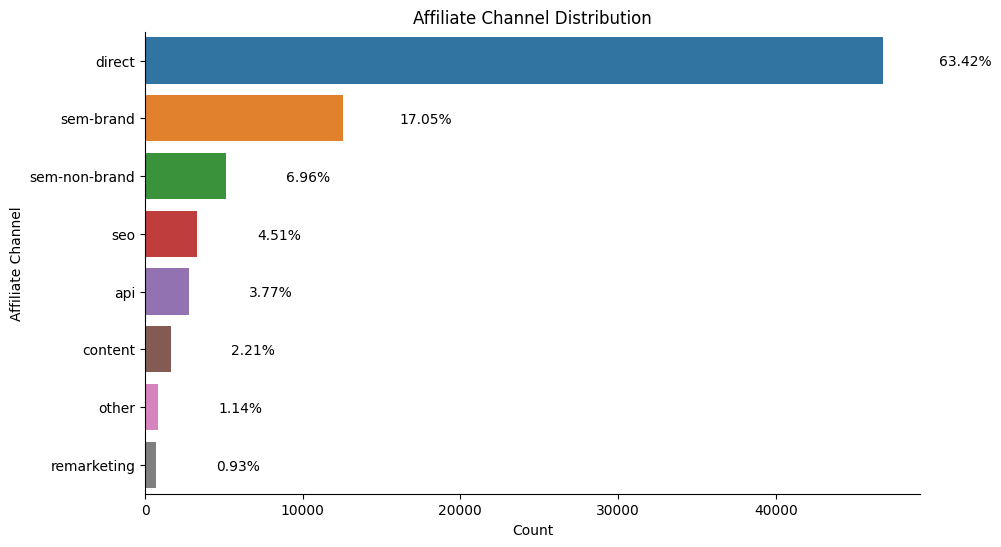

In [47]:
plt.figure(figsize=(10,6))
counts = merged_df['affiliate_channel'].value_counts()
counts_order = counts.index
sns.countplot(y=merged_df['affiliate_channel'], order=counts_order);
plt.ylabel('Affiliate Channel')
plt.xlabel('Count')
plt.title('Affiliate Channel Distribution')
for i in range(counts.shape[0]):
    plt.text(counts[i]+5200, i+0.09, f"{counts[i]/merged_df.shape[0]*100:0.2f}%", ha='center', fontsize=10)
sns.despine();

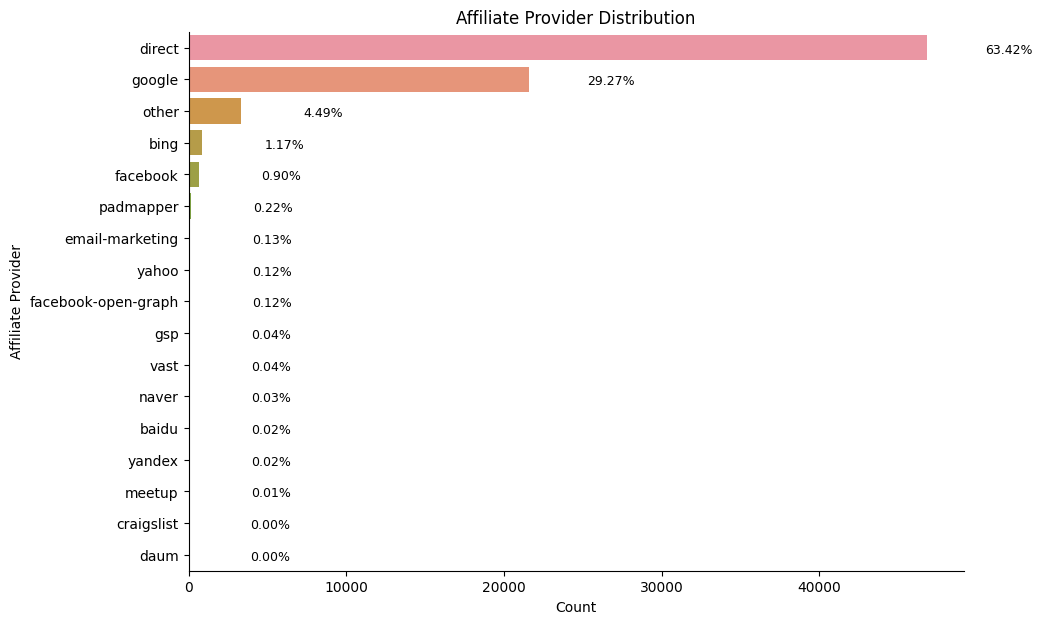

In [48]:
plt.figure(figsize=(10,7))
counts = merged_df['affiliate_provider'].value_counts()
counts_order = counts.index
sns.countplot(y=merged_df['affiliate_provider'], order=counts_order);
plt.ylabel('Affiliate Provider')
plt.xlabel('Count')
plt.title('Affiliate Provider Distribution')
for i in range(counts.shape[0]):
    plt.text(counts[i]+5200, i+0.17, f"{counts[i]/merged_df.shape[0]*100:0.2f}%", ha='center', fontsize=9)
sns.despine();

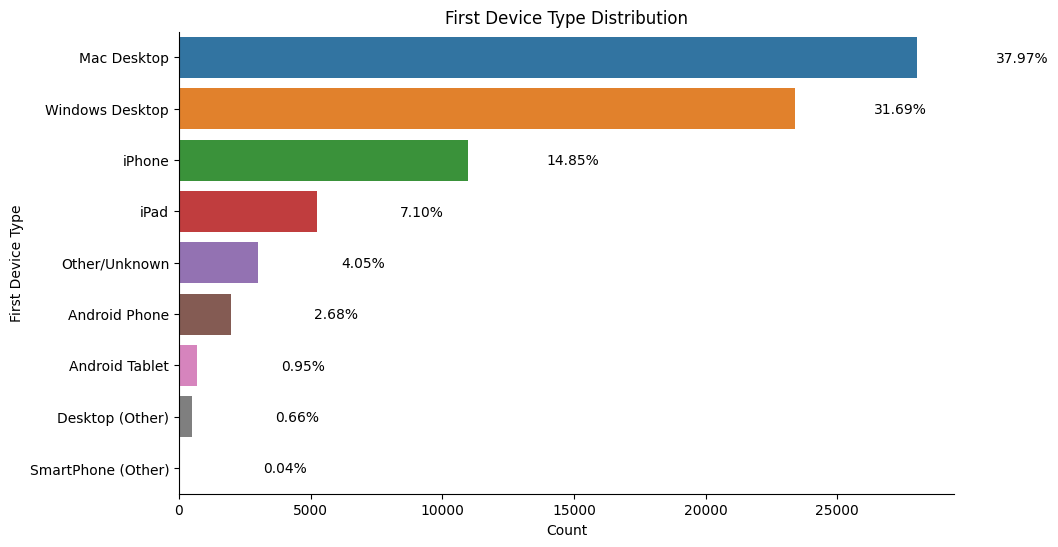

In [49]:
plt.figure(figsize=(10,6))
counts = merged_df['first_device_type'].value_counts()
counts_order = counts.index
sns.countplot(data=merged_df, y='first_device_type', order=counts_order);
plt.ylabel('First Device Type')
plt.xlabel('Count')
plt.title('First Device Type Distribution')
for i in range(counts.shape[0]):
    plt.text(counts[i]+4000, i+0.09, f"{counts[i]/merged_df.shape[0]*100:0.2f}%", ha='center', fontsize=10)
sns.despine();

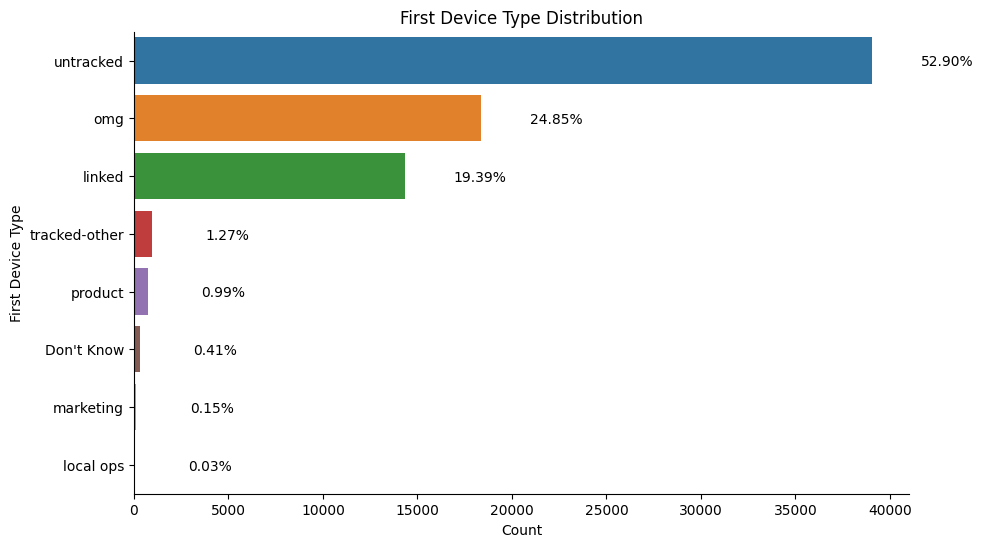

In [50]:
plt.figure(figsize=(10,6))
counts = merged_df['first_affiliate_tracked'].value_counts()
counts_order = counts.index
sns.countplot(data=merged_df, y='first_affiliate_tracked', order=counts_order);
plt.ylabel('First Device Type')
plt.xlabel('Count')
plt.title('First Device Type Distribution')
for i in range(counts.shape[0]):
    plt.text(counts[i]+4000, i+0.09, f"{counts[i]/merged_df.shape[0]*100:0.2f}%", ha='center', fontsize=10)
sns.despine();

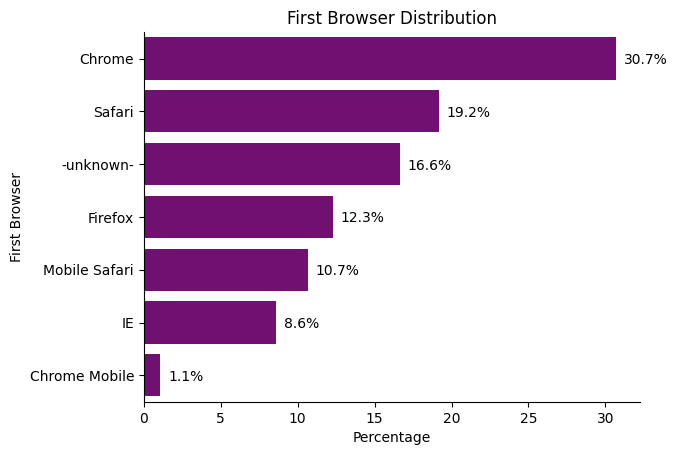

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace "Don't Know" with NaN
merged_df['age'].replace("Don't Know", np.nan, inplace=True)

# Create a bar chart with the 'first_browser' on the y-axis and percentage on the x-axis
counts = merged_df["first_browser"].value_counts(normalize=True) * 100
counts = counts[counts > 1]
ax = sns.barplot(x=counts, y=counts.index, color='purple')

# Set the x-axis and y-axis labels and the title
plt.xlabel('Percentage')
plt.ylabel('First Browser')
plt.title('First Browser Distribution')

# Add percentage labels to the right of each bar
for i, v in enumerate(counts):
    if v > 1:
        plt.text(v + 0.5, i + 0.1, f'{v:.1f}%', fontsize=10)

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


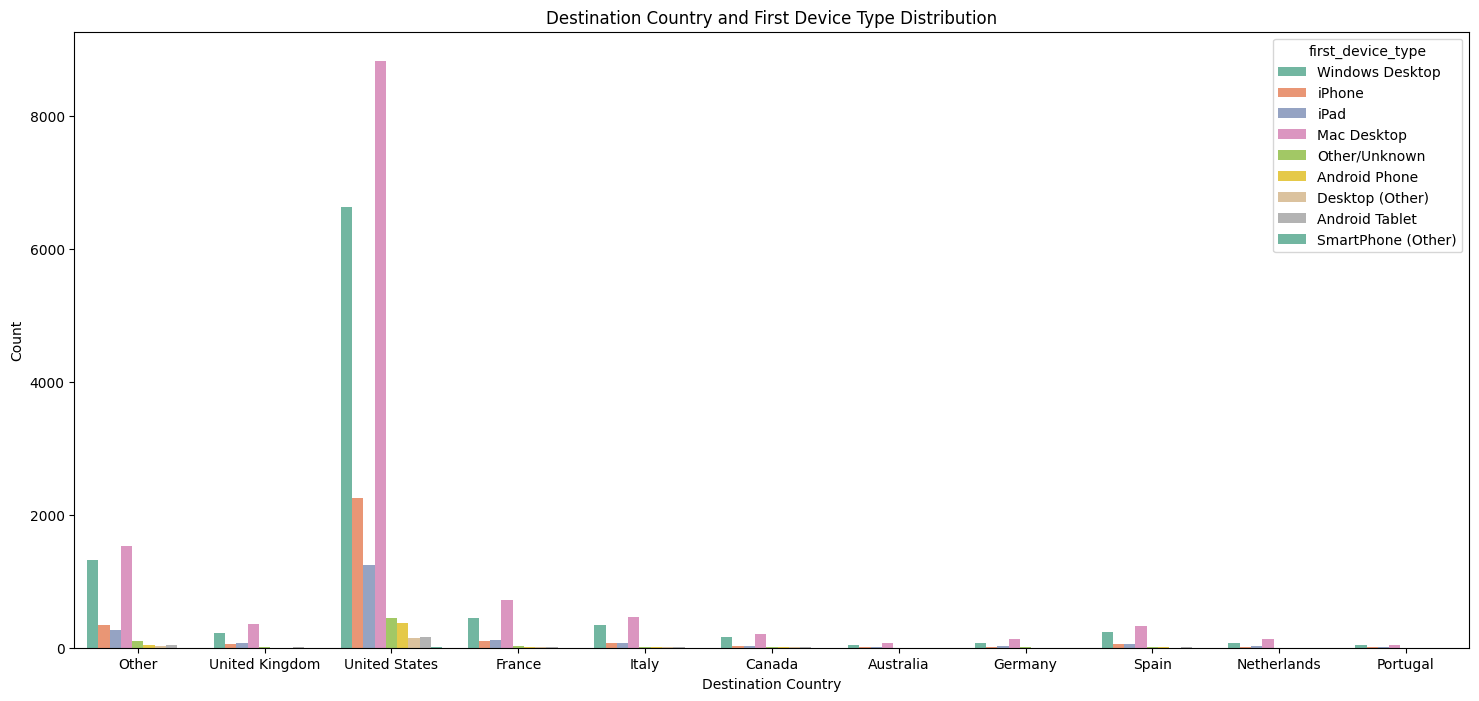

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns


non_en_users_other = merged_df[merged_df['country_destination'] != 'No Destination']


# Create a bar plot for first device type and destination country distribution
plt.figure(figsize=(18, 8))
sns.countplot(data=non_en_users_other, x='country_destination', hue='first_device_type', palette='Set2')
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.title('Destination Country and First Device Type Distribution')

plt.show()

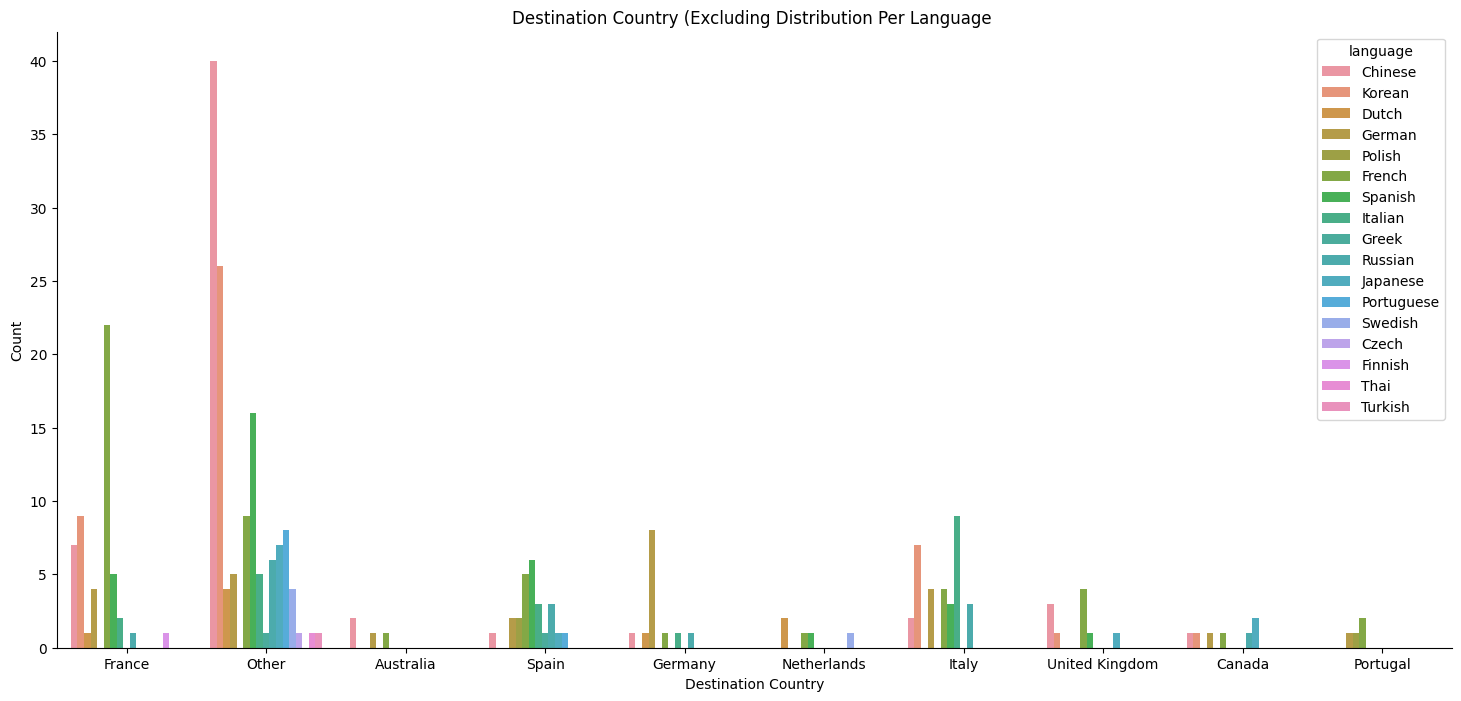

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter non-English users and exclude specific countries
non_en_users_other = merged_df[np.logical_and(merged_df['language'] != 'English',
                                              ~merged_df['country_destination'].isin(['No Destination', 'United States']))]

# Create a bar plot
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=non_en_users_other, x='country_destination', hue='language')
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.title('Destination Country (Excluding Distribution Per Language ')
sns.move_legend(ax, "upper right")
sns.despine()

# Add percentage labels to the top of each bar
total = len(non_en_users_other)

plt.show()

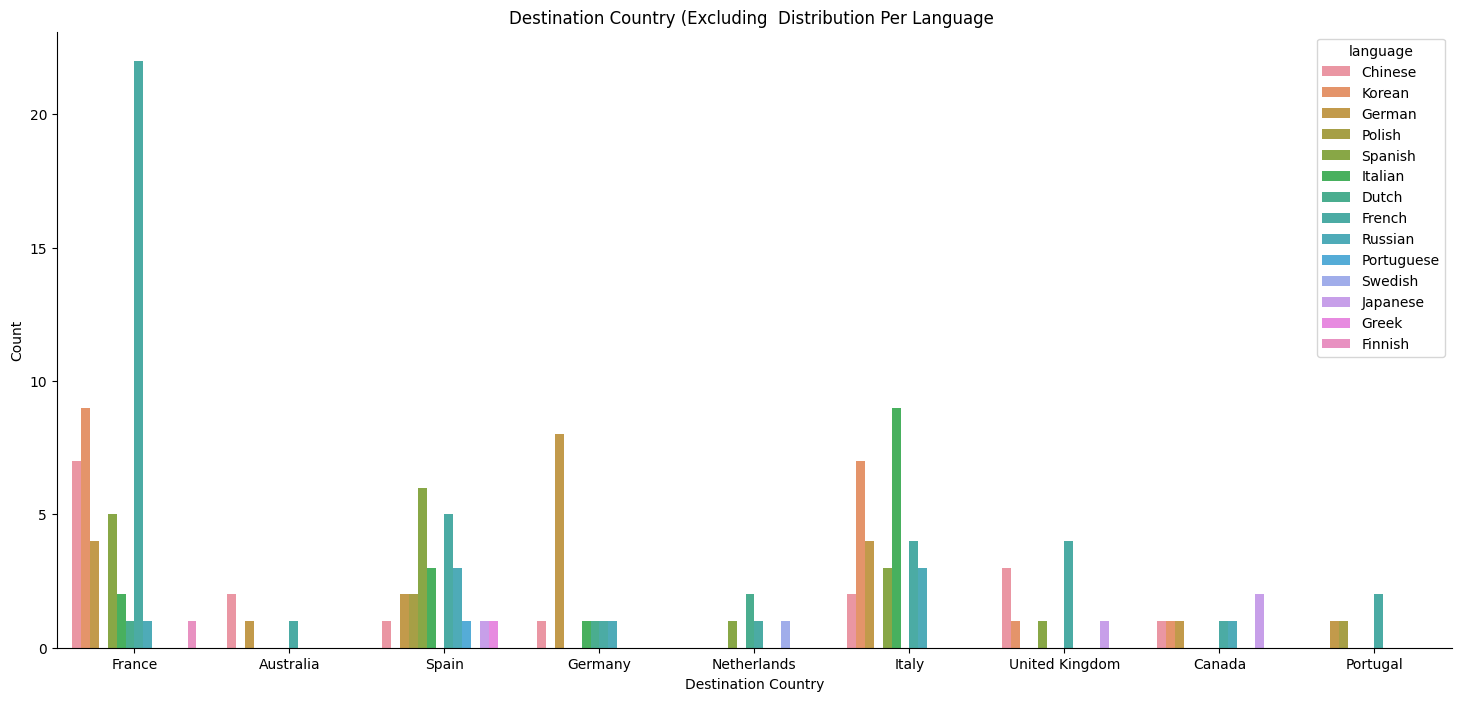

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter non-English users and exclude specific countries
non_en_users_other = merged_df[np.logical_and(merged_df['language'] != 'English',
                                              ~merged_df['country_destination'].isin(['No Destination', 'United States','Other']))]

# Create a bar plot
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=non_en_users_other, x='country_destination', hue='language')
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.title('Destination Country (Excluding  Distribution Per Language ')
sns.move_legend(ax, "upper right")
sns.despine()

# Add percentage labels to the top of each bar
total = len(non_en_users_other)

plt.show()

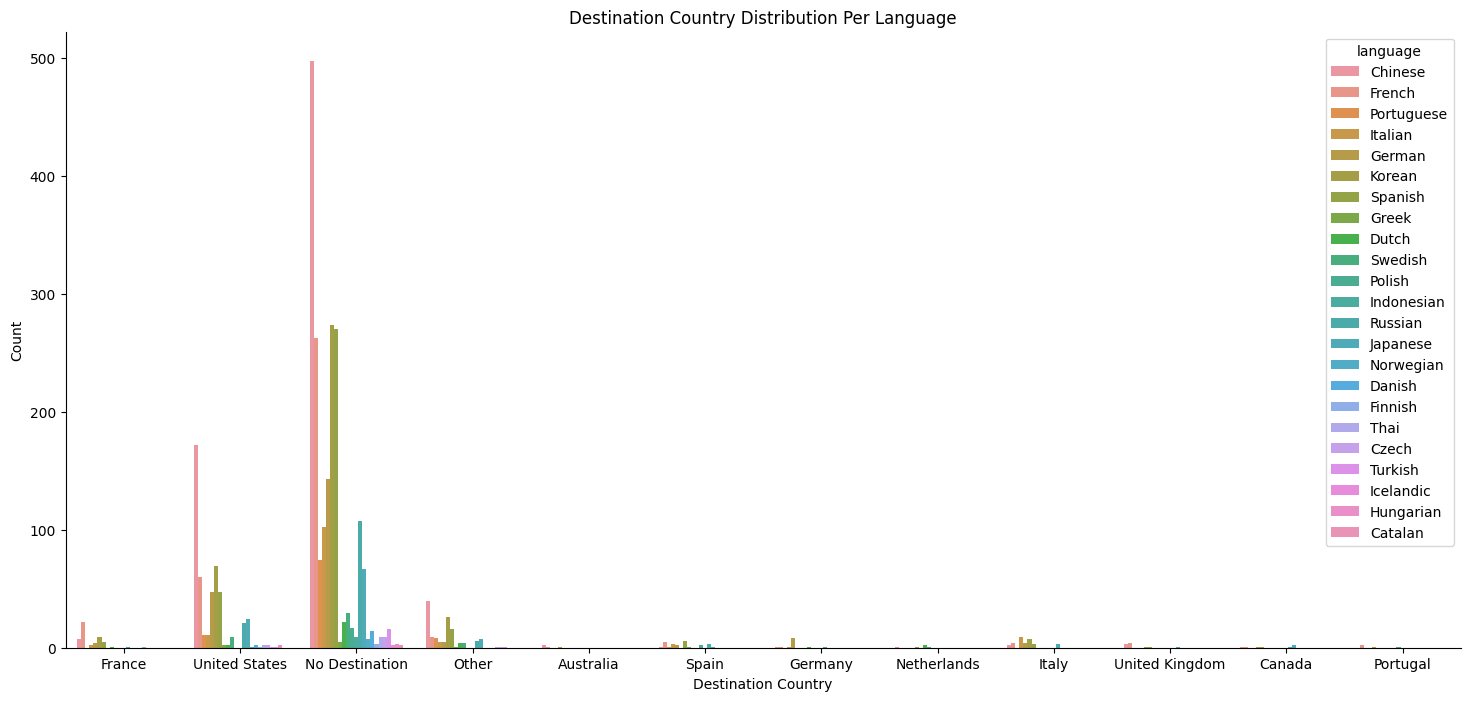

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter non-English users and exclude specific countries
non_en_users_other = merged_df[merged_df['language'] !='English']

# Create a bar plot
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=non_en_users_other, x='country_destination', hue='language')
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.title('Destination Country Distribution Per Language')
sns.move_legend(ax, "upper right")
sns.despine()


plt.show()


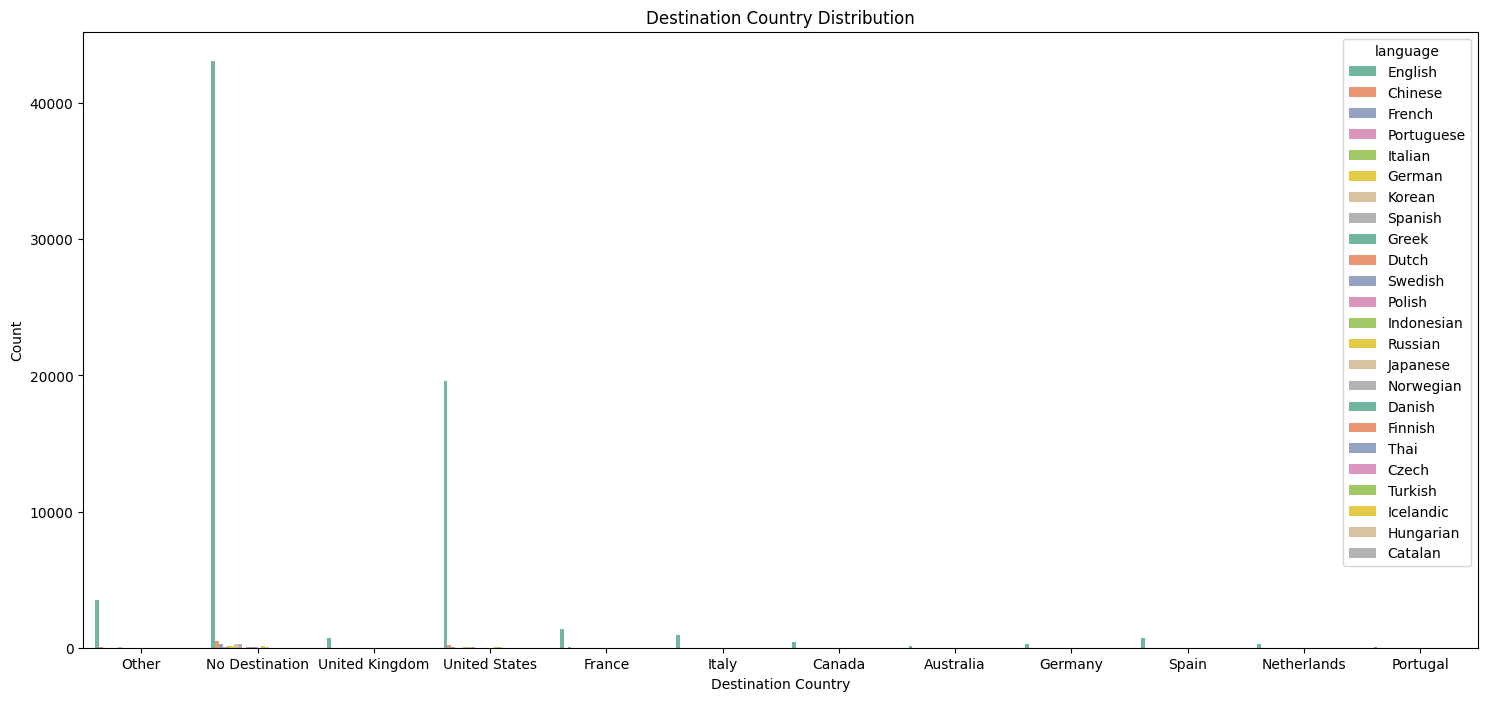

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for destination country distribution
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=merged_df, x='country_destination', hue='language', palette='Set2')
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.title('Destination Country Distribution')
plt.show()



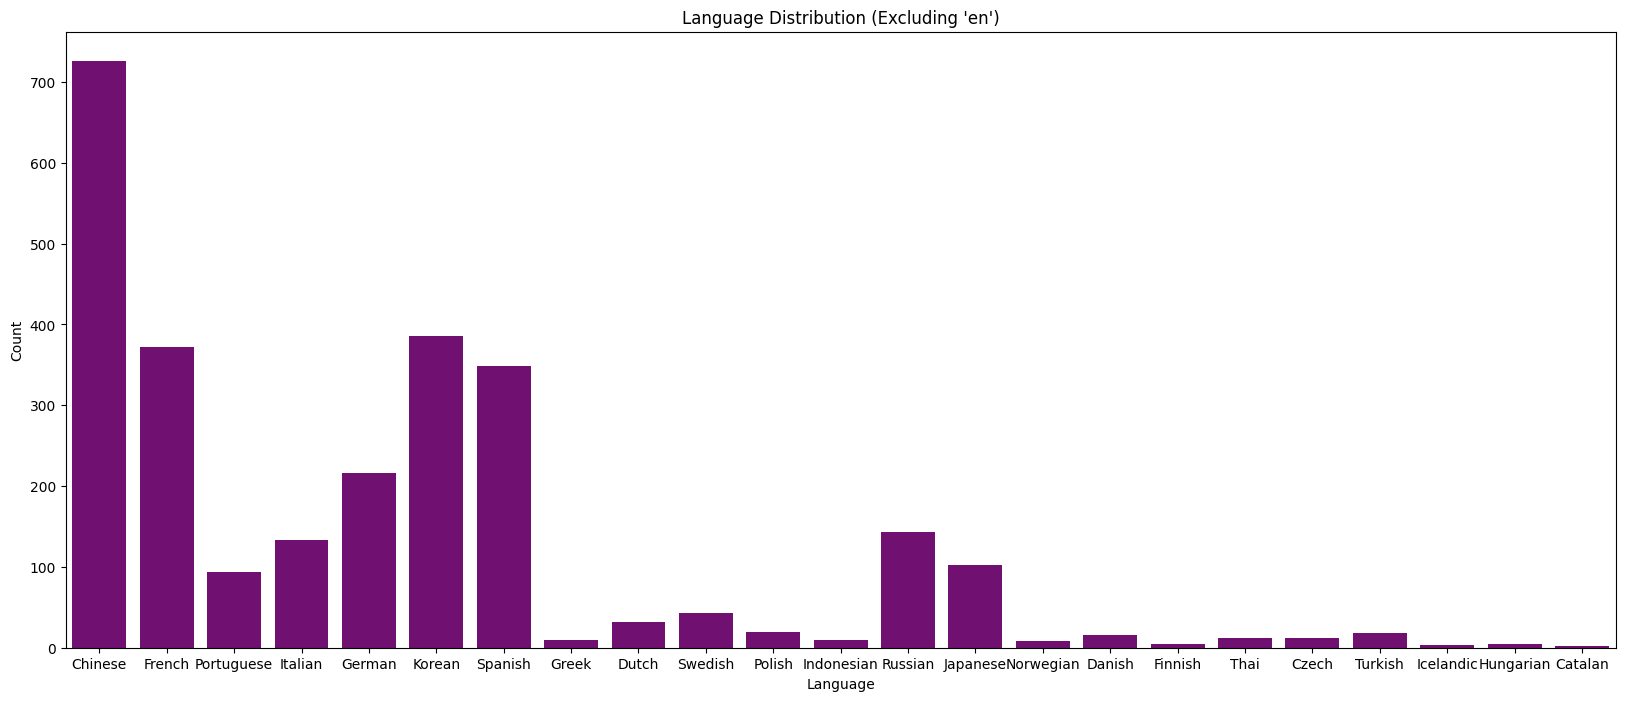

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for language distribution
plt.figure(figsize=(20, 8))
sns.countplot(data=merged_df[merged_df['language'] != 'English'], x='language', color='purple')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Language Distribution (Excluding \'en\')')

# Add percentage labels to the top of each bar
total = len(merged_df[merged_df['language'] != 'English'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 50
    ax.annotate(percentage, (x, y), fontsize=12)


plt.show()



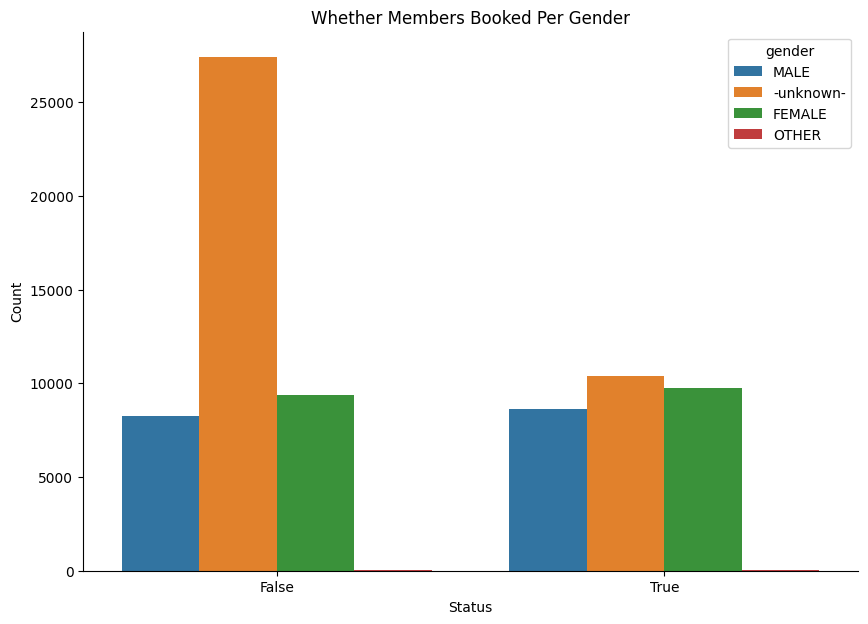

In [58]:
plt.figure(figsize=(10,7))
gender_ndf = pd.concat([merged_df['gender'].fillna('NaN'), np.logical_not(merged_df.date_first_booking.rename('Booked').isna())], axis=1)
g = sns.countplot(data=gender_ndf, x='Booked', hue='gender');
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Whether Members Booked Per Gender')
sns.despine();

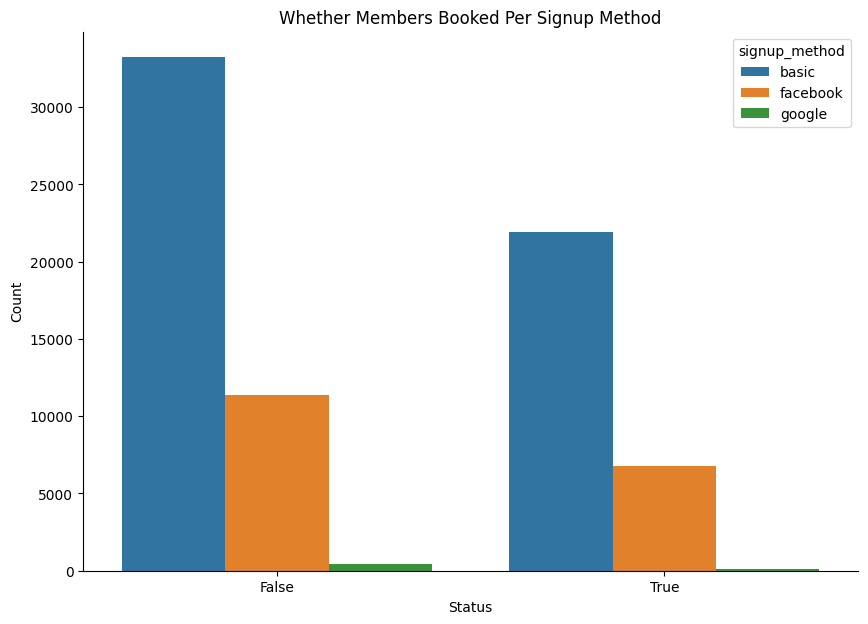

In [59]:
plt.figure(figsize=(10,7))
signup_ndf = pd.concat([merged_df['signup_method'], np.logical_not(merged_df.date_first_booking.isna())], axis=1)
sns.countplot(data=signup_ndf, x='date_first_booking', hue='signup_method');
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Whether Members Booked Per Signup Method')
sns.despine();

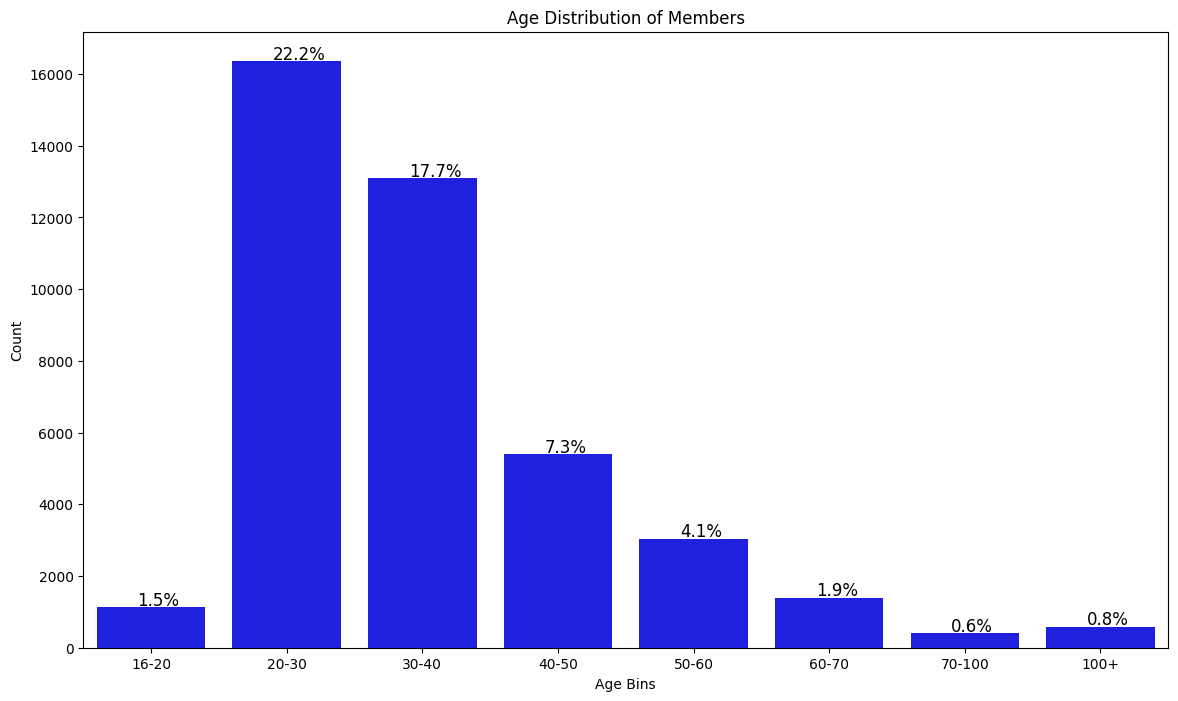

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace missing or invalid values with NaN
merged_df['age'] = pd.to_numeric(merged_df['age'], errors='coerce')

# Define age bins
age_bins = [16, 20, 30, 40, 50, 60, 70, 100, np.inf]
age_labels = ['16-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-100', '100+']

# Create age range column
merged_df['member_age_bins'] = pd.cut(merged_df['age'], bins=age_bins, labels=age_labels)

# Create a bar graph
plt.figure(figsize=[14, 8])
ax = sns.countplot(x='member_age_bins', data=merged_df, color='blue')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Age Distribution of Members')

# Add percentage labels to the top of each bar
total = len(merged_df['member_age_bins'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 50
    ax.annotate(percentage, (x, y), fontsize=12)

plt.show()

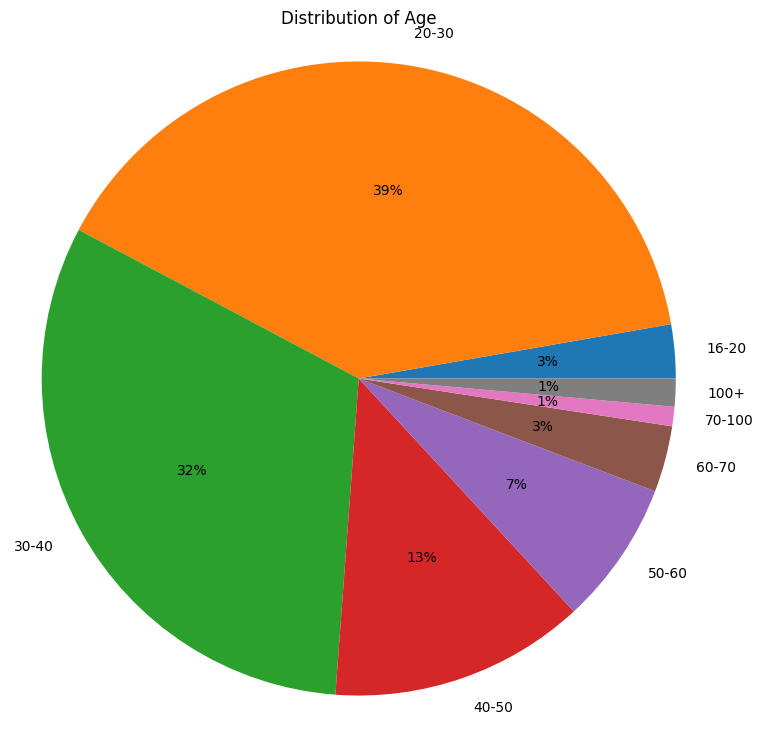

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age bins
age_bins = [16, 20, 30, 40, 50, 60, 70, 100, 'DN']
age_labels = ['16-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-100', '100+']

# Assuming 'merged_df' is your DataFrame
grouped_df = merged_df.groupby(['member_age_bins']).size().reset_index(name='count')

# Create a larger figure for the pie chart
plt.figure(figsize=(9, 9))

# Create the pie chart
plt.pie(grouped_df['count'], labels=grouped_df['member_age_bins'], autopct='%1.0f%%')
plt.title('Distribution of Age')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()



In [62]:
grouped_df

,member_age_bins,count
0,16-20,1137
1,20-30,16363
2,30-40,13090
3,40-50,5404
4,50-60,3044
5,60-70,1399
6,70-100,409
7,100+,590
